# Exploratory Data Analysis (EDA)

# Import Required Libraries 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [69]:
print("EXPLORATORY DATA ANALYSIS (EDA)")

EXPLORATORY DATA ANALYSIS (EDA)


In [70]:
plt.style.use('default') 
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 10
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
%matplotlib inline

In [71]:
import os
os.makedirs("../data/visualizations",exist_ok=True)
print("Directory Created: ../data/visualizations")

Directory Created: ../data/visualizations


# Load Cleaned Dataset

In [72]:
df=pd.read_csv("../data/processed/crop_data_cleaned.csv")

In [73]:
print("\n Data loaded successfully")
print(f"Shape: {df.shape}")
print(f"\nColumns:{list(df.columns)}")
print(f"\nFirst 5 rows:\n{df.head()}")


 Data loaded successfully
Shape: (2200, 8)

Columns:['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

First 5 rows:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [74]:
features=["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
target="label"

In [75]:
print(f"\n Features:{len(features)}")
print(f"Target:{target}")


 Features:7
Target:label


# Dataset Overview Statistics

In [76]:
print("\n1. BASIC STATISTICS:")
print(df[features].describe().T)


1. BASIC STATISTICS:
              count        mean        std        min        25%        50%  \
N            2200.0   50.551818  36.917334   0.000000  21.000000  37.000000   
P            2200.0   53.362727  32.985883   5.000000  28.000000  51.000000   
K            2200.0   48.149091  50.647931   5.000000  20.000000  32.000000   
temperature  2200.0   25.616244   5.063749   8.825675  22.769375  25.598693   
humidity     2200.0   71.481779  22.263812  14.258040  60.261953  80.473146   
ph           2200.0    6.469480   0.773938   3.504752   5.971693   6.425045   
rainfall     2200.0  103.463655  54.958389  20.211267  64.551686  94.867624   

                    75%         max  
N             84.250000  140.000000  
P             68.000000  145.000000  
K             49.000000  205.000000  
temperature   28.561654   43.675493  
humidity      89.948771   99.981876  
ph             6.923643    9.935091  
rainfall     124.267508  298.560117  


In [77]:
print("\n2. Data Distribution Summary")
for feature in features:
    print(f"\n{feature}")
    print(f"Range:[{df[feature].min()}, {df[feature].max()}]")
    print(f"Mean: {df[feature].mean():.2f}")
    print(f"Median: {df[feature].median():.2f}")
    print(f"Mode: {df[feature].mode()[0]:.2f}")
    print(f"Standard Deviation: {df[feature].std():.2f}")
    print(f"Variance: {df[feature].var():.2f}")
    print(f"Skewness: {df[feature].skew():.2f}")
    print(f"Kurtosis: {df[feature].kurtosis():.2f}")


2. Data Distribution Summary

N
Range:[0, 140]
Mean: 50.55
Median: 37.00
Mode: 22.00
Standard Deviation: 36.92
Variance: 1362.89
Skewness: 0.51
Kurtosis: -1.06

P
Range:[5, 145]
Mean: 53.36
Median: 51.00
Mode: 60.00
Standard Deviation: 32.99
Variance: 1088.07
Skewness: 1.01
Kurtosis: 0.86

K
Range:[5, 205]
Mean: 48.15
Median: 32.00
Mode: 17.00
Standard Deviation: 50.65
Variance: 2565.21
Skewness: 2.38
Kurtosis: 4.45

temperature
Range:[8.825674745, 43.67549305]
Mean: 25.62
Median: 25.60
Mode: 8.83
Standard Deviation: 5.06
Variance: 25.64
Skewness: 0.18
Kurtosis: 1.23

humidity
Range:[14.25803981, 99.98187601]
Mean: 71.48
Median: 80.47
Mode: 14.26
Standard Deviation: 22.26
Variance: 495.68
Skewness: -1.09
Kurtosis: 0.30

ph
Range:[3.504752314, 9.93509073]
Mean: 6.47
Median: 6.43
Mode: 3.50
Standard Deviation: 0.77
Variance: 0.60
Skewness: 0.28
Kurtosis: 1.66

rainfall
Range:[20.21126747, 298.5601175]
Mean: 103.46
Median: 94.87
Mode: 20.21
Standard Deviation: 54.96
Variance: 3020.42
Ske

# Visualization 1  Distribution of All Features (Histograms)

VISUALIZATION 1: FEATURE DISTRIBUTIONS (Histograms)

Saved: 01_feature_distributions_histogram.png


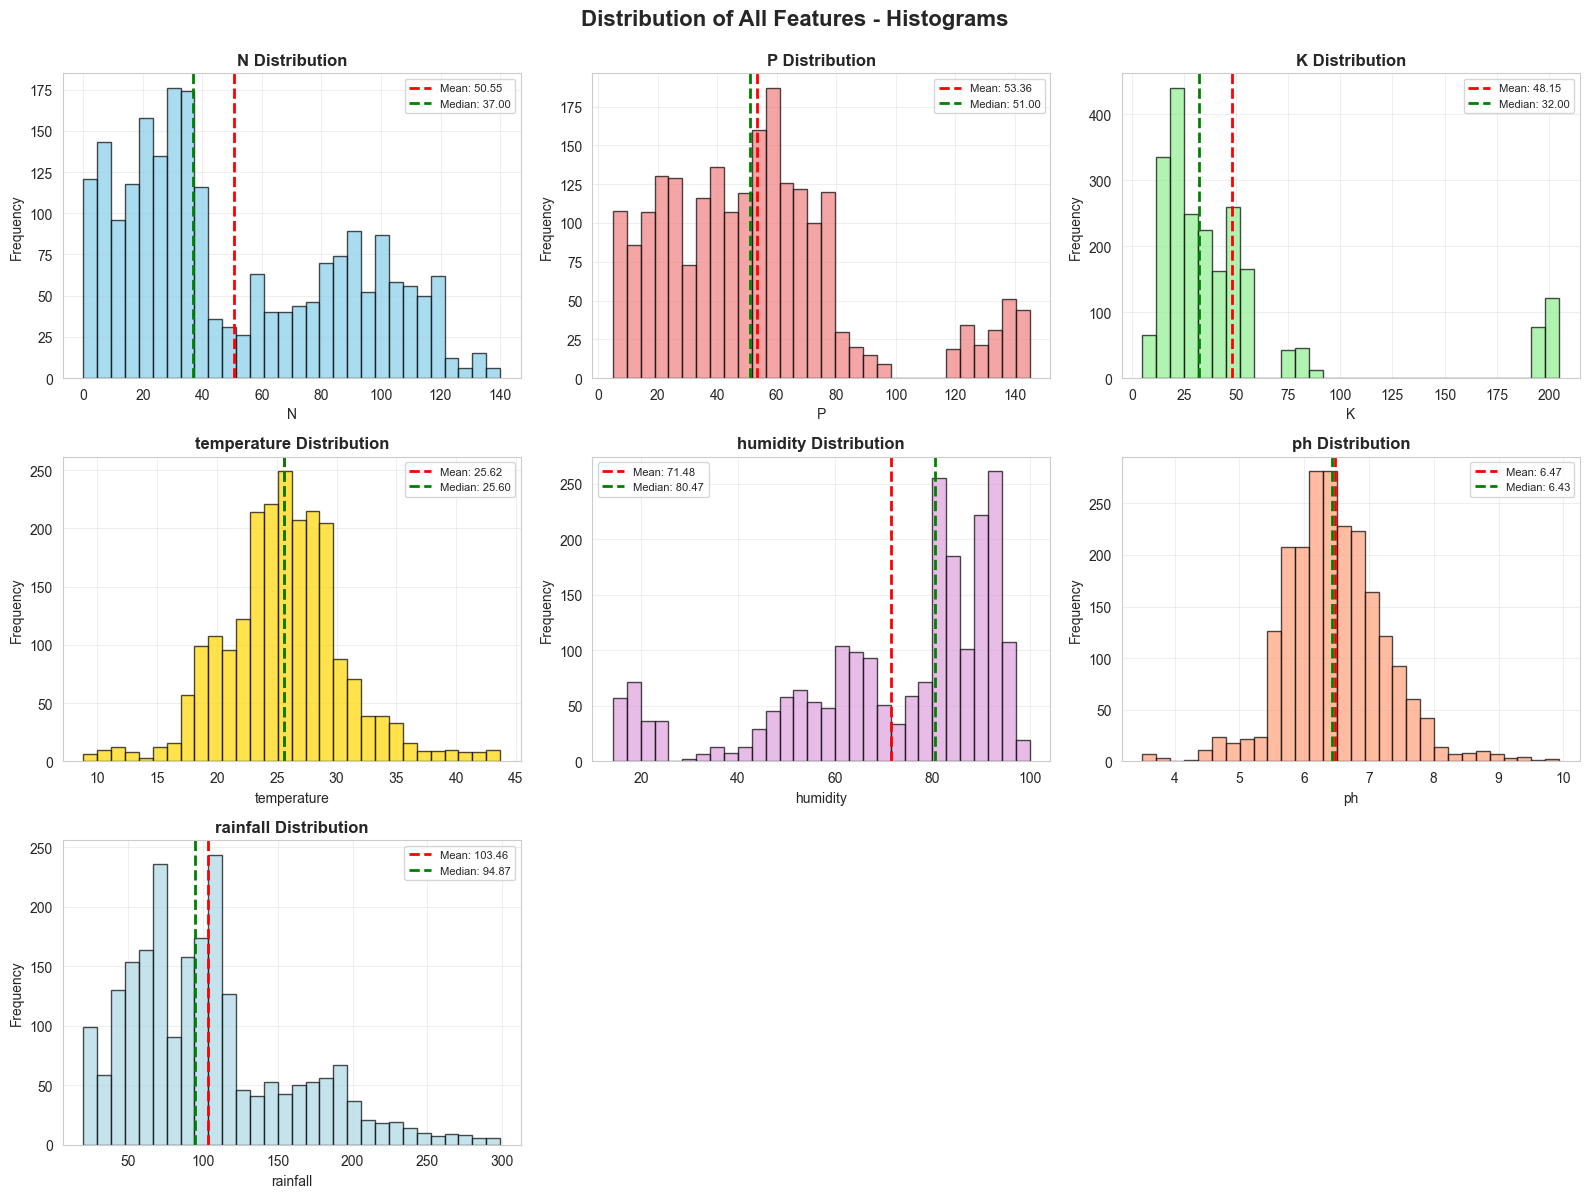

In [95]:
print("VISUALIZATION 1: FEATURE DISTRIBUTIONS (Histograms)")

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
fig.suptitle('Distribution of All Features - Histograms', fontsize=16, fontweight='bold', y=0.995)

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'lightsalmon', 'lightblue']

for idx, feature in enumerate(features):
    row = idx // 3
    col = idx % 3
    
    axes[row, col].hist(df[feature], bins=30, color=colors[idx], edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'{feature} Distribution', fontweight='bold')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    
    axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[row, col].legend(fontsize=8)
    axes[row, col].grid(True, alpha=0.3)

for idx in range(len(features), 9):
    row = idx // 3
    col = idx % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.savefig('../data/visualizations/01_feature_distributions_histogram.png', dpi=300, bbox_inches='tight')
print("\nSaved: 01_feature_distributions_histogram.png")
plt.show()


# Visualization 2 - Box Plots for All Features

In [80]:
print("Visualization 2: FEATURE DISTRIBUTIONS (Box Plots)")

Visualization 2: FEATURE DISTRIBUTIONS (Box Plots)



Saved: 02_feature_boxplots.png


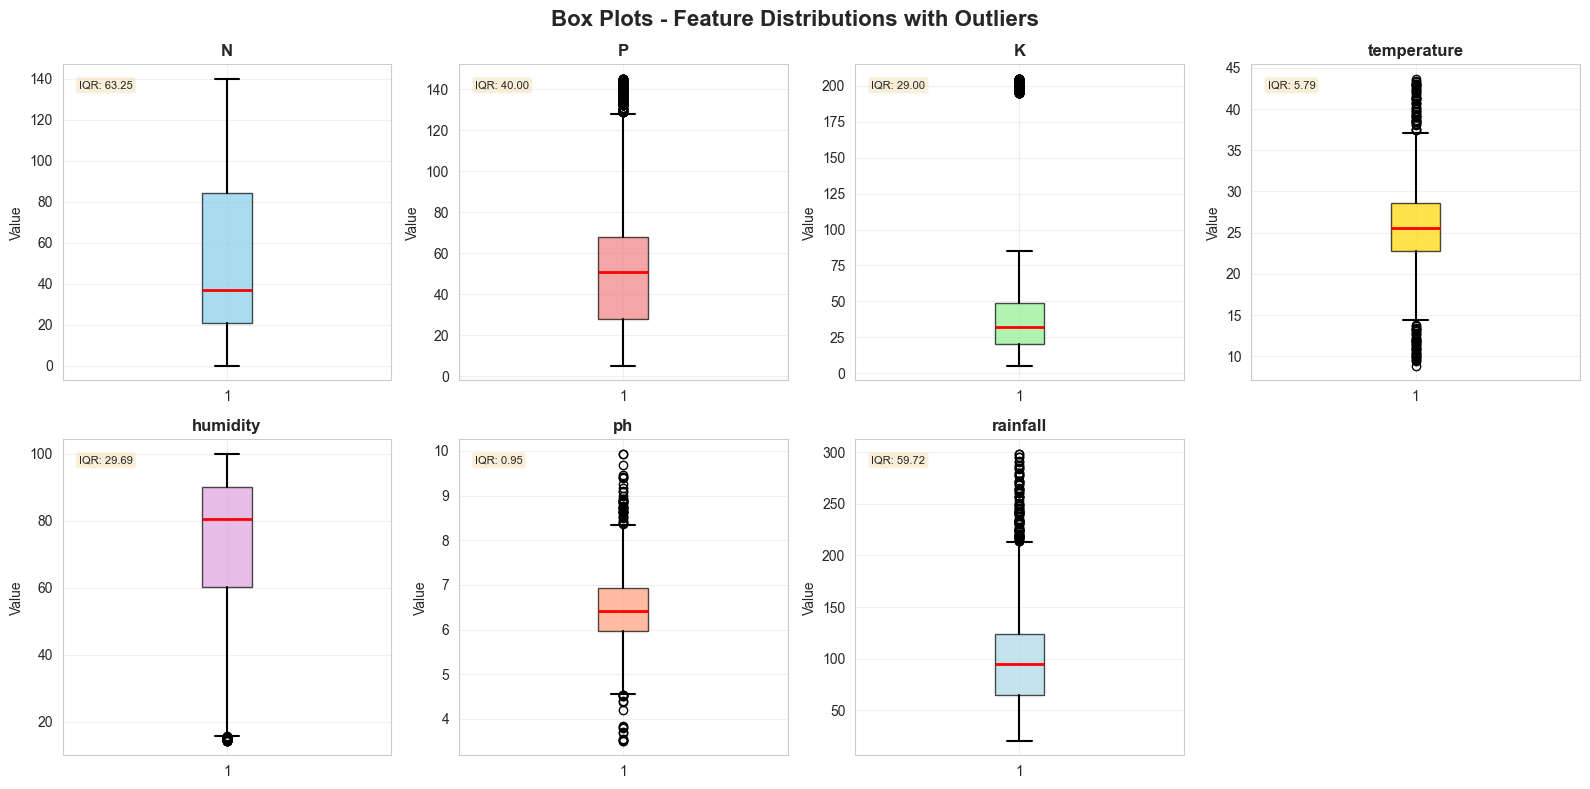

In [96]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Box Plots - Feature Distributions with Outliers', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features):
    row = idx // 4
    col = idx % 4
    
    bp = axes[row, col].boxplot(df[feature], vert=True, patch_artist=True,
                                  boxprops=dict(facecolor=colors[idx], alpha=0.7),
                                  medianprops=dict(color='red', linewidth=2),
                                  whiskerprops=dict(color='black', linewidth=1.5),
                                  capprops=dict(color='black', linewidth=1.5))
    
    axes[row, col].set_title(f'{feature}', fontweight='bold')
    axes[row, col].set_ylabel('Value')
    axes[row, col].grid(True, alpha=0.3)
    
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    axes[row, col].text(0.05, 0.95, f'IQR: {iqr:.2f}', transform=axes[row, col].transAxes,
                        fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
fig.delaxes(axes[1, 3])

plt.tight_layout()
plt.savefig('../data/visualizations/02_feature_boxplots.png', dpi=300, bbox_inches='tight')
print("\nSaved: 02_feature_boxplots.png")
plt.show()

# Visualization 3 - Correlation Heatmap

In [97]:
print("Visualization 3: Correlation Heatmap")

Visualization 3: Correlation Heatmap


In [102]:
correlation_matrix=df[features].corr()
print(f"\n Correlation Matrix{correlation_matrix}")


 Correlation Matrix                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  



Saved: 03_correlation_heatmap.png


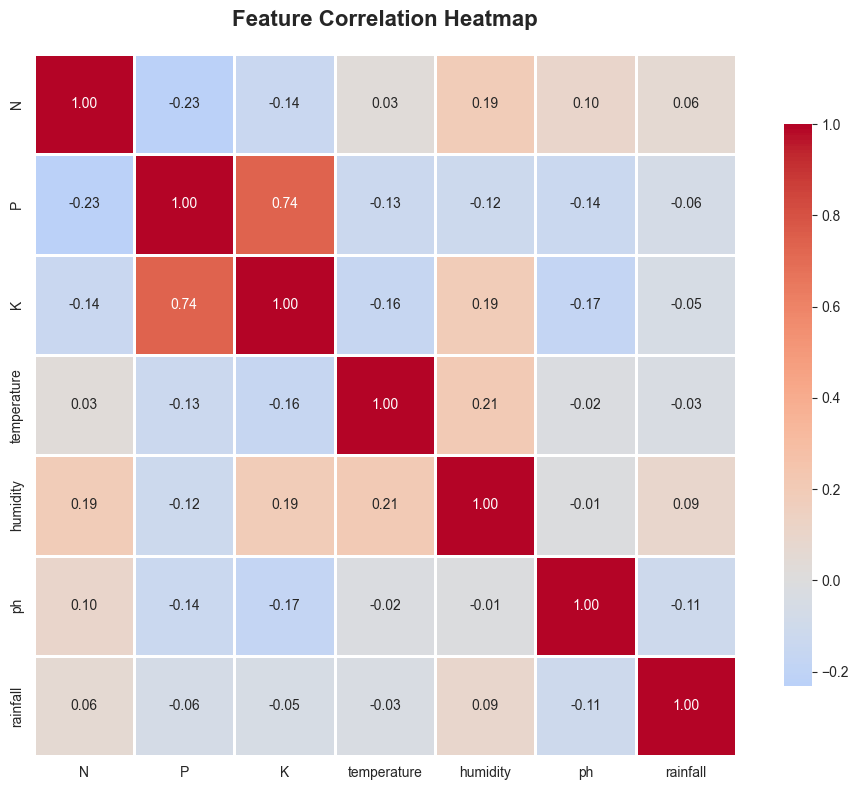

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",center=0,square=True,linewidths=1,cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Heatmap",fontsize=16,fontweight="bold",pad=20)
plt.tight_layout()
plt.savefig("../data/visualizations/03_correlation_heatmap.png",dpi=300,bbox_inches="tight")
print("\nSaved: 03_correlation_heatmap.png")
plt.show()

In [106]:
# Find highly correlated pairs
print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")

high_corr_pairs = []
for i in range(len(features)):
    for j in range(i+1,len(features)):
        corr_val=correlation_matrix.iloc[i,j]
        if abs(corr_val)>0.5:
            high_corr_pairs.append((features[i],features[j],corr_val))
            print(f"{features[i]:12} - {features[j]:12} : {corr_val:6.3f}")

if len(high_corr_pairs)==0:
    print("No highly correlated feature pairs found.")


Highly Correlated Feature Pairs (|correlation| > 0.7):
P            - K            :  0.736


# Visualization 4 - Pair Plot (Scatter Matrix)

In [107]:
print("Visualization 4: Pair Plot (Scatter Matrix)")

Visualization 4: Pair Plot (Scatter Matrix)


In [108]:
sample_df=df.sample(n=500, random_state=42)


 Creating pair plot with sample of 500 records

Saved: 04_pairplot_features.png


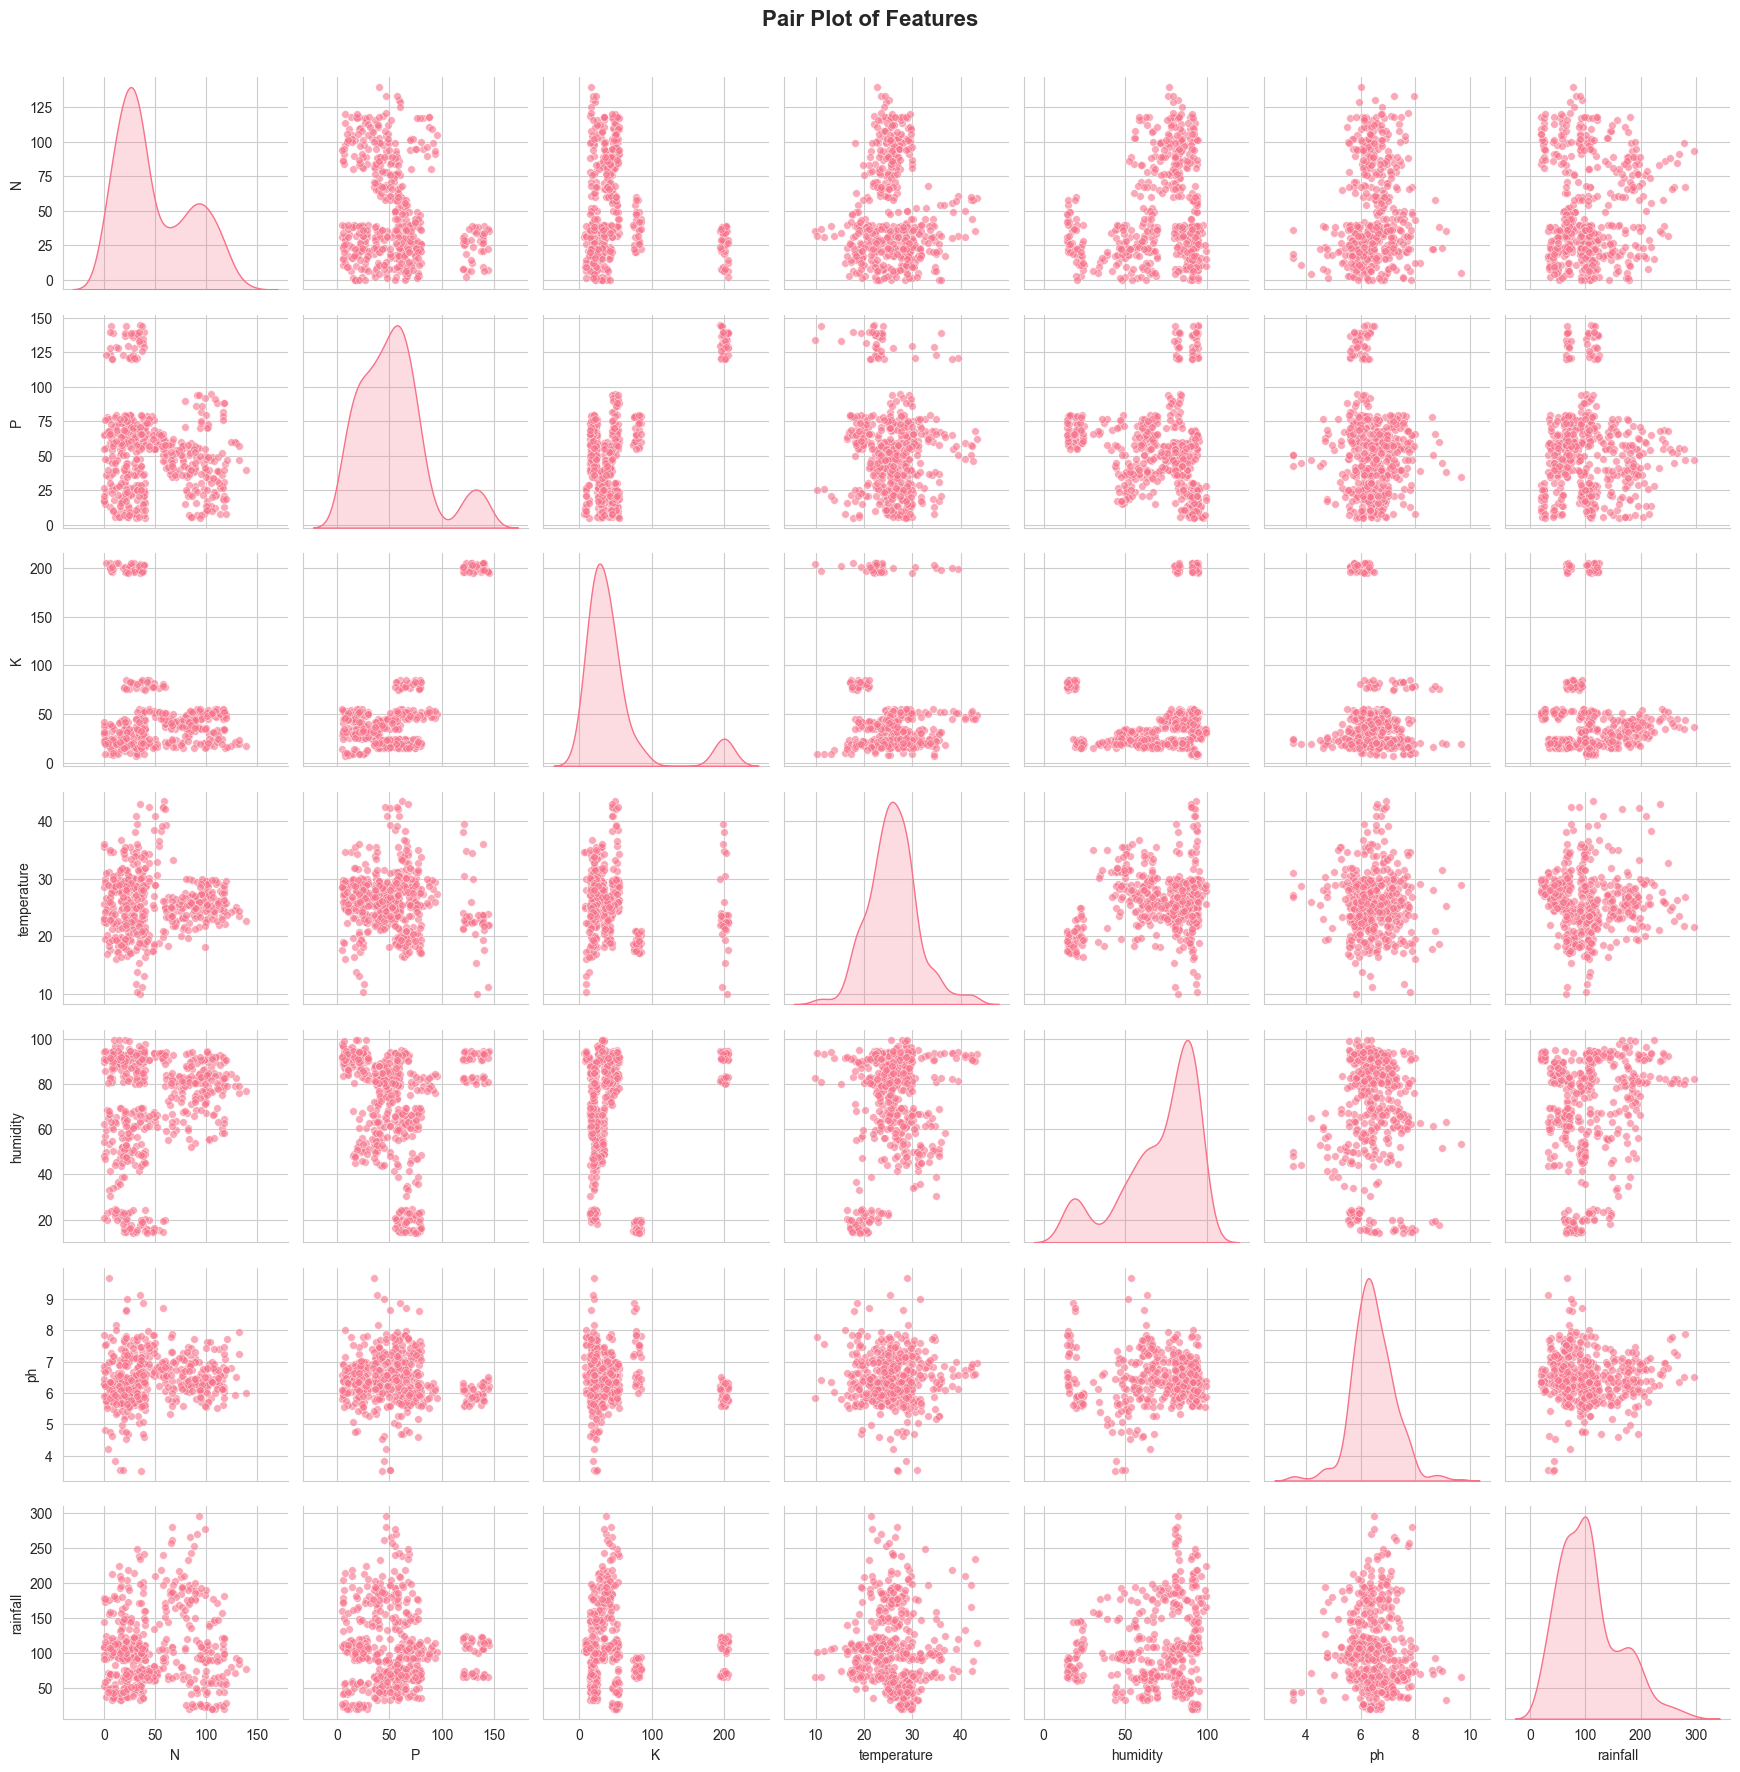

In [109]:
print("\n Creating pair plot with sample of 500 records")
pairplot=sns.pairplot(sample_df[features],diag_kind="kde",plot_kws={"alpha":0.6,"s":30})
pairplot.figure.suptitle("Pair Plot of Features",fontsize=16,fontweight="bold",y=1.01)
plt.tight_layout()
plt.savefig("../data/visualizations/04_pairplot_features.png",dpi=300,bbox_inches="tight")
print("\nSaved: 04_pairplot_features.png")
plt.show()